# Initial Exploratory Data Analysis
To make this concise a straightforward, I'll plot only relevant charts without all the fancy statistical metrics for nerds. I've already looked at dozens of plots and calculated metrics on this data using Power BI and Tableau. On future notebooks, though, we'll take a more rigorous approach on how to analyze this.

I'll default to plot only 2019 values, so there's no COVID effect and to make it consistent. But metrics don't change that much over the years, overall.

Also, I focus on GDP per Capita because it's a great proxy for any of the other SocioEconomic metrics of this DataSet.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#pd.set_option('display.max_rows', 150)
#pd.set_option('display.min_rows', 65)
pd.set_option('display.max_columns', None)

In [2]:
df_base = pd.read_csv("..\Data_Sets\processed\economicData_1995-2022.csv")
df_2019 = df_base[df_base['Index Year'] == 2019].copy()

### Some aspects of Economic Freedom are more important than others
Not all 12 aspects of EF are the same. Some influence prosperity more than others. 'Size of Government' overall seem to actually  go against EF's principles (in other words, the less Government, the less prosperity in any metric of this DataSet).

Labor Freedom is another 'problematic' aspect of Economic Freedom. Note how there's a wide spread of Labor Freedom on various GDP per Capita levels for the richest 40%, specially top 20% countries.

#### Summary of Economic Freedom Aspect, by importance:

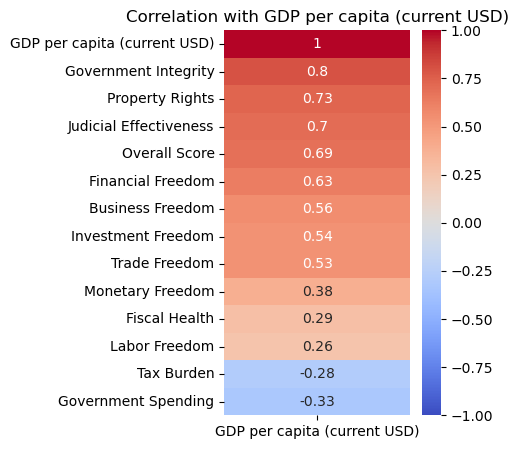

In [3]:
X = [
    'Overall Score',
    'Property Rights',
    'Government Integrity',
    'Judicial Effectiveness',
    'Government Spending',
    'Tax Burden',
    'Fiscal Health',
    'Business Freedom',
    'Monetary Freedom',
    'Labor Freedom',
    'Financial Freedom',
    'Investment Freedom',
    'Trade Freedom']

# Computing the correlation matrix
corr_matrix = df_2019[X + ['GDP per capita (current USD)']].corr()
gdp_corr = corr_matrix[['GDP per capita (current USD)']]


plt.figure(figsize=(3, 5))
sns.heatmap(gdp_corr.sort_values(by='GDP per capita (current USD)', ascending=False),
            vmin=-1,
            vmax=1,
            annot=True,
            cmap='coolwarm')
plt.title("Correlation with GDP per capita (current USD)")
plt.show()

#### The worst of Economic Freedom

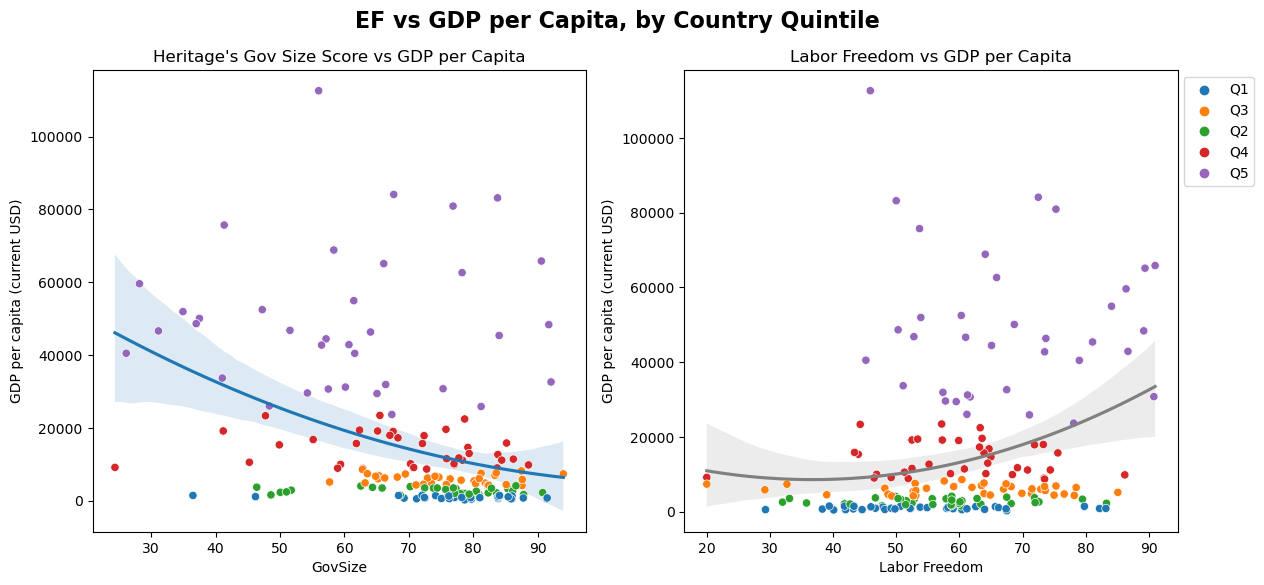

In [4]:
df_2019['GovSize'] = (df_2019['Government Spending'] + df_2019['Tax Burden']) / 2

# Create two side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 1st plot
sns.regplot(x='GovSize', y='GDP per capita (current USD)', data=df_2019, order=2, ax=ax1, scatter_kws={'s':0})
sns.scatterplot(x='GovSize', y='GDP per capita (current USD)', data=df_2019, hue='Country Quintile', ax=ax1, legend=False)
ax1.set_title("Heritage's Gov Size Score vs GDP per Capita")

# 2nd plot
sns.regplot(x='Labor Freedom', y='GDP per capita (current USD)', data=df_2019, order=2, ax=ax2, scatter_kws={'s':0}, color='gray') # gray regression line
sns.scatterplot(x='Labor Freedom', y='GDP per capita (current USD)', data=df_2019, hue='Country Quintile', ax=ax2)
ax2.set_title("Labor Freedom vs GDP per Capita")
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))

fig.suptitle('EF aspects vs GDP per Capita, by Country Quintile', fontsize=16, fontweight='bold')

plt.show()


#### The best of Economic Freedom

Text(0.5, 0.98, 'Economic Freedom most important metric')

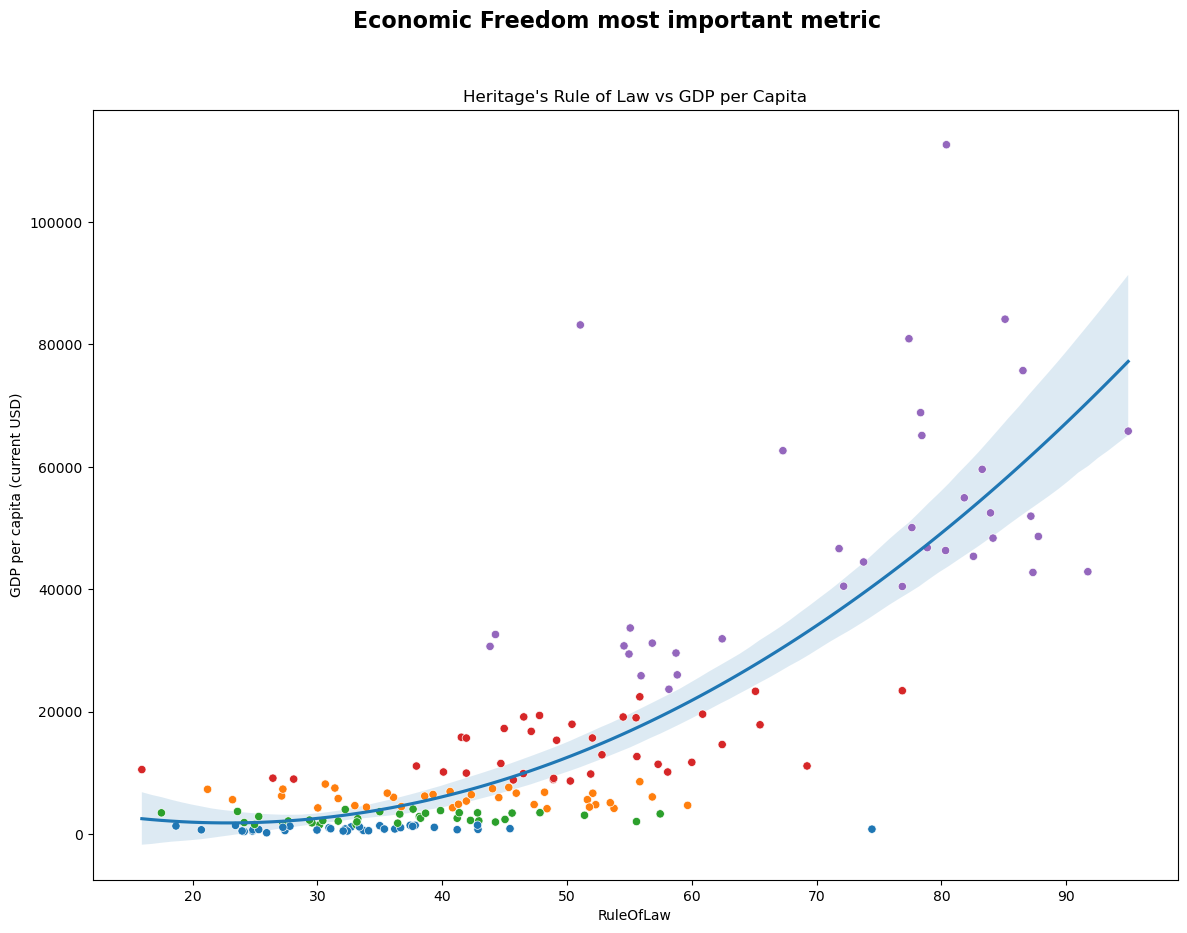

In [5]:
df_2019['RuleOfLaw'] = (df_2019['Property Rights'] + df_2019['Government Integrity'] + df_2019['Judicial Effectiveness']) / 3
fig, ax1 = plt.subplots(1, figsize=(14, 10))

sns.regplot(x='RuleOfLaw', y='GDP per capita (current USD)', data = df_2019, order = 2, scatter_kws={'s':0})
sns.scatterplot(x='RuleOfLaw', y='GDP per capita (current USD)', data=df_2019, hue='Country Quintile', legend=False)

ax1.set_title("Heritage's Rule of Law vs GDP per Capita")
fig.suptitle('Economic Freedom most important metric', fontsize=16, fontweight='bold')

### Economic Freedom and Inequality
Economic Freedom doesn't seem to affect inequality (Gini Index) that much, neither positively nor negatively.

The negative slope could be better explained by the correlation of Gini vs GDP per capita. (as shown in the second chart)

Text(0.5, 1.0, 'Economic Freedom vs Gini Index')

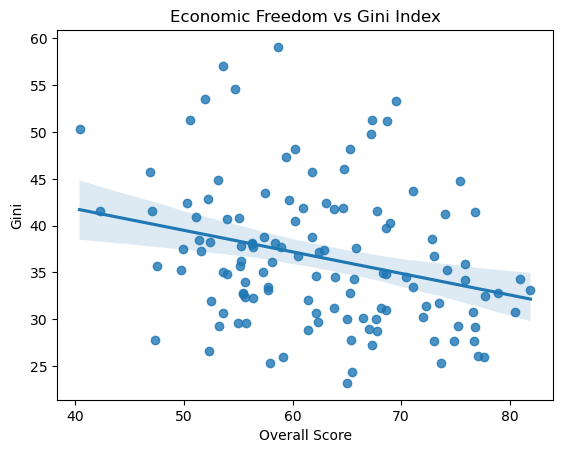

In [6]:
sns.regplot(x='Overall Score', y='Gini', data = df_2019, order = 1)

plt.title('Economic Freedom vs Gini Index')

Text(0.5, 1.0, 'GDP per Capita vs Gini Index')

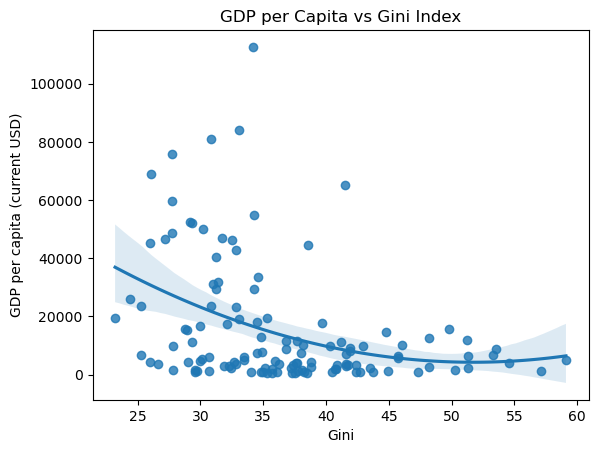

In [7]:
sns.regplot(x='Gini', y='GDP per capita (current USD)', data = df_2019, order = 2)

plt.title('GDP per Capita vs Gini Index')

### Economic Freedom and Purchasing Power
The correlation gets even stronger when we compare GDP PPP per Capita, as opposed with the simple GDP per Capita.

(-500.0, 125000.0)

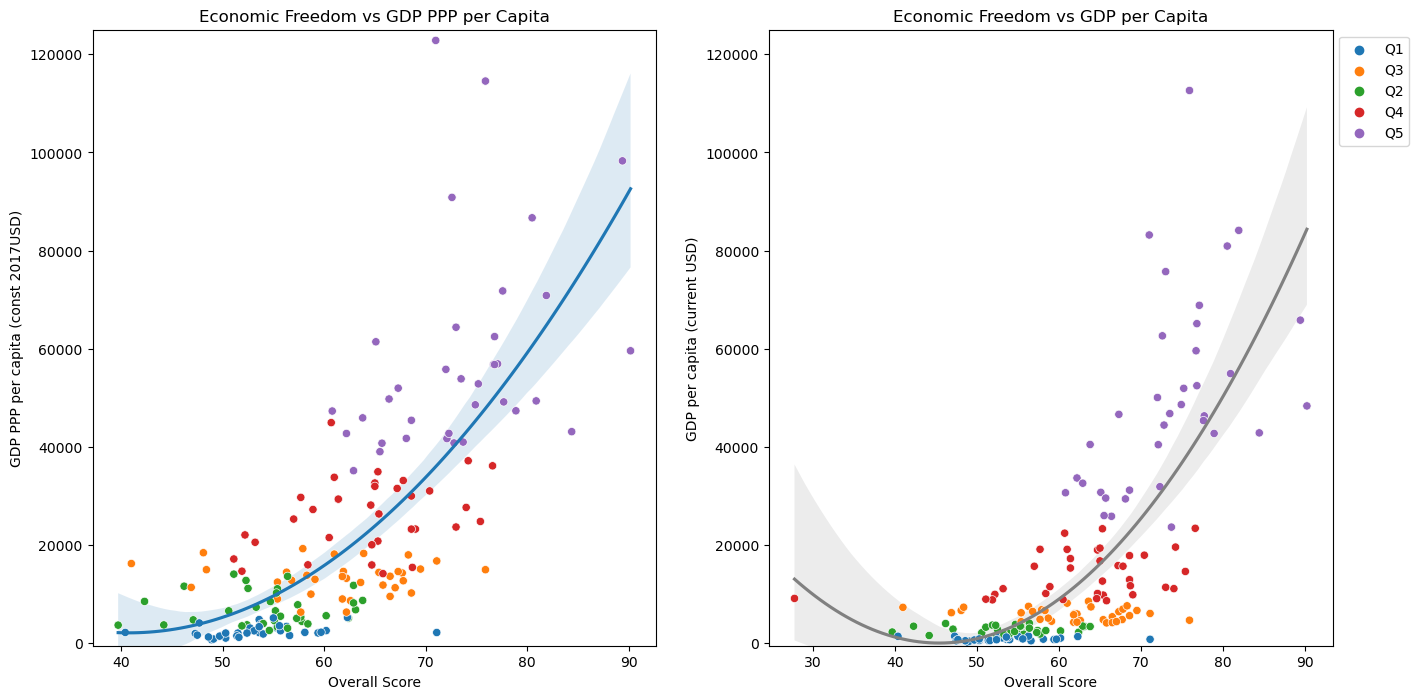

In [8]:
df_2019['RuleOfLaw'] = (df_2019['Property Rights'] + df_2019['Government Integrity'] + df_2019['Judicial Effectiveness']) / 3
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

polyOrder = 2

# 1st plot
sns.regplot(x='Overall Score', y='GDP PPP per capita (const 2017USD)', data=df_2019, order=polyOrder, ax=ax1, scatter_kws={'s':0})
sns.scatterplot(x='Overall Score', y='GDP PPP per capita (const 2017USD)', data=df_2019, hue='Country Quintile', ax=ax1, legend=False)
ax1.set_title("Economic Freedom vs GDP PPP per Capita")

# 2nd plot
sns.regplot(x='Overall Score', y='GDP per capita (current USD)', data=df_2019, order=polyOrder, ax=ax2, scatter_kws={'s':0}, color='gray') # gray regression line
sns.scatterplot(x='Overall Score', y='GDP per capita (current USD)', data=df_2019, hue='Country Quintile', ax=ax2)
ax2.set_title("Economic Freedom vs GDP per Capita")
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))

ax1.set_ylim(-500, 125000)
ax2.set_ylim(-500, 125000)
